In [3]:
!pip install gpxpy

In [23]:
import pandas as pd
import os

Total Distance: 65.71 miles
Elevation Gain: 11043 ft
Elevation Loss: 11043 ft
Max Elevation: 4331 ft
Min Elevation: 1329 ft
Average Grade: 3.18%


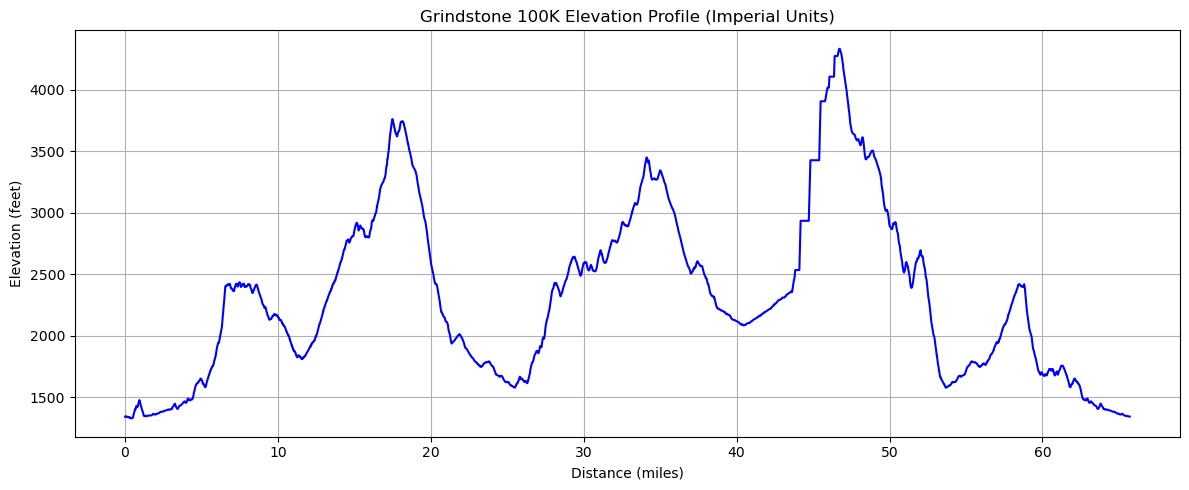

In [11]:
import gpxpy
import matplotlib.pyplot as plt

# === Load GPX File ===
gpx_path = r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\grindstone\2025_grindstone_course.gpx'
with open(gpx_path, 'r') as f:
    gpx = gpxpy.parse(f)

# Initialize Variables
total_distance_m = 0
elevation_gain_m = 0
elevation_loss_m = 0
elevations_m = []
distances_m = []

# Process Track Points
for track in gpx.tracks:
    for segment in track.segments:
        prev_point = None
        for point in segment.points:
            if prev_point:
                dist = point.distance_3d(prev_point)
                total_distance_m += dist
                distances_m.append(total_distance_m)
                delta_elev = point.elevation - prev_point.elevation
                if delta_elev > 0:
                    elevation_gain_m += delta_elev
                else:
                    elevation_loss_m -= delta_elev
            else:
                distances_m.append(0)
            elevations_m.append(point.elevation)
            prev_point = point

# Convert to Imperial Units
meters_to_miles = 0.000621371
meters_to_feet = 3.28084

total_distance_mi = total_distance_m * meters_to_miles
elevation_gain_ft = elevation_gain_m * meters_to_feet
elevation_loss_ft = elevation_loss_m * meters_to_feet
elevations_ft = [e * meters_to_feet for e in elevations_m]
distances_mi = [d * meters_to_miles for d in distances_m]

max_elev_ft = max(elevations_ft)
min_elev_ft = min(elevations_ft)
avg_grade = (elevation_gain_ft / (total_distance_mi * 5280)) * 100 if total_distance_mi > 0 else 0

# Print Stats
print(f"Total Distance: {total_distance_mi:.2f} miles")
print(f"Elevation Gain: {elevation_gain_ft:.0f} ft")
print(f"Elevation Loss: {elevation_loss_ft:.0f} ft")
print(f"Max Elevation: {max_elev_ft:.0f} ft")
print(f"Min Elevation: {min_elev_ft:.0f} ft")
print(f"Average Grade: {avg_grade:.2f}%")

# Plot Elevation Profile
plt.figure(figsize=(12, 5))
plt.plot(distances_mi, elevations_ft, color='blue')
plt.title("Grindstone 100K Elevation Profile (Imperial Units)")
plt.xlabel("Distance (miles)")
plt.ylabel("Elevation (feet)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
with open(r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\grindstone\2025_grindstone_course.gpx', 'r') as f:
    gpx = gpxpy.parse(f)

# Check for waypoints
if gpx.waypoints:
    for wpt in gpx.waypoints:
        print(f"POI: {wpt.name} at ({wpt.latitude}, {wpt.longitude})")
else:
    print("No standalone POIs found.")

POI: Start/Finish at (38.35832, -79.08354)
POI: Lick Run Aid Station #1 & #9 at (38.3726, -79.13929)
POI: Wolf Ridge Aid Station #2 at (38.431775054860466, -79.1276630458701)
POI: Sand Spring Aid Station #3 at (38.41760732487779, -79.14186785643619)
POI: North River Gap Aid Station # 4 & #8 at (38.36702411187591, -79.16449541805807)
POI: Lookout Mtn Aid Station #5 at (38.323202593782156, -79.2009442645186)
POI: Magic Moss Aid Station #6 at (38.32854690442824, -79.27892706485571)
POI: Camp Todd Aid Station #7 at (38.36881739212805, -79.27361464195221)


In [38]:
# Unit conversions
meters_to_miles = 0.000621371
meters_to_feet = 3.28084
altitude_threshold_ft = 4000

# Directory containing GPX files
gpx_dir = r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx'

summary_rows = []


for filename in os.listdir(gpx_dir):
    if filename.endswith('.gpx'):
        gpx_path = os.path.join(gpx_dir, filename)
        with open(gpx_path, 'r') as f:
            gpx = gpxpy.parse(f)

        # Initialize metrics
        total_distance_m = 0
        elevation_gain_m = 0
        elevation_loss_m = 0
        altitude_exposure_m = 0
        elevations_m = []
        distances_m = []

        # Process track points
        for track in gpx.tracks:
            for segment in track.segments:
                prev_point = None
                for point in segment.points:
                    # Skip if elevation data is missing
                    if point.elevation is None or (prev_point and prev_point.elevation is None):
                        prev_point = point
                        continue
        
                    if prev_point:
                        dist = point.distance_3d(prev_point)
                        total_distance_m += dist
                        distances_m.append(total_distance_m)
        
                        delta_elev = point.elevation - prev_point.elevation
                        if delta_elev > 0:
                            elevation_gain_m += delta_elev
                        else:
                            elevation_loss_m -= delta_elev
        
                        if point.elevation * meters_to_feet > altitude_threshold_ft:
                            altitude_exposure_m += dist
                    else:
                        distances_m.append(0)
        
                    elevations_m.append(point.elevation)
                    prev_point = point

        # Convert units
        total_distance_mi = total_distance_m * meters_to_miles
        elevation_gain_ft = elevation_gain_m * meters_to_feet
        elevation_loss_ft = elevation_loss_m * meters_to_feet
        altitude_exposure_mi = altitude_exposure_m * meters_to_miles
        max_elev_ft = max(elevations_m) * meters_to_feet
        min_elev_ft = min(elevations_m) * meters_to_feet
        avg_grade = (elevation_gain_ft / (total_distance_mi * 5280)) * 100 if total_distance_mi > 0 else 0

        # Extract race name and year
        parts = filename.replace(".gpx", "").split("_")
        year = next((p for p in parts if p.isdigit()), "Unknown")
        race_name = " ".join([p.capitalize() for p in parts if not p.isdigit()])

        # Append summary
        summary_rows.append({
            "file": filename,
            "race": race_name,
            "year": year,
            "distance_mi": round(total_distance_mi, 2),
            "elevation_gain_ft": round(elevation_gain_ft),
            "elevation_loss_ft": round(elevation_loss_ft),
            "max_elev_ft": round(max_elev_ft),
            "min_elev_ft": round(min_elev_ft),
            "avg_grade_pct": round(avg_grade, 2),
            "altitude_exposure_mi": round(altitude_exposure_mi, 2),
            "num_waypoints": len(gpx.waypoints)
        })


In [39]:
df_summary = pd.DataFrame(summary_rows)
print("\n📋 Summary DataFrame:")
df_summary


📋 Summary DataFrame:


file          race  year  distance_mi  elevation_gain_ft  \
0  2024_black_canyon.gpx  Black Canyon  2024        62.93               5605   
1           2025_ccc.gpx           Ccc  2025        62.53              20049   
2       2025_chianti.gpx       Chianti  2025        74.92              19800   
3    2025_grindstone.gpx    Grindstone  2025        65.71              11043   
4      2025_tarawera.gpx      Tarawera  2025        63.69              11149   
5          2025_utmb.gpx          Utmb  2025       108.69              34480   

   elevation_loss_ft  max_elev_ft  min_elev_ft  avg_grade_pct  \
0               7726         4190         1741           1.69   
1              20640         8406         3408           6.07   
2              19798         2957          949           5.01   
3              11043         4331         1329           3.18   
4              10348         2396          130           3.32   
5              34477         8325         2658           6.01   

   altitude_exposure_mi  num_waypoints  
0                  4.53              9  
1                 57.75              0  
2                  0.00              0  
3                  1.25              8  
4                  0.00             10  
5                 85.40              0